ZigZagエッジの場合

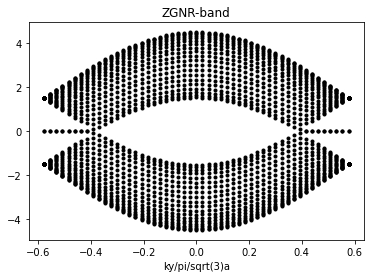

In [6]:
import numpy
import math
import matplotlib.pyplot as plt

#zigzag nanoribbon
'calculate band dispersion along Gamma Y'
sample=51
t=1.5

modelsize=20

kpoint=numpy.linspace(-1/numpy.sqrt(3),1/numpy.sqrt(3),sample)

tot=[]

for ky in kpoint:
    
    kya=ky*math.pi
    '2x2 matrix for upper'
    upper=[[0.0, t],
            [0.0, 0.0]
            ]
    '2x2 matrix for lower'
    lower=[[0.0, 0.0],
            [t, 0.0]
            ]
    '2x2 matrix for other diagonal block'
    diag=[[0.0, t*2.0*math.cos(numpy.sqrt(3)*kya/2.0)],
            [t*2.0*math.cos(numpy.sqrt(3)*kya/2.0), 0.0]
            ]
    
    'fill the matrix'
    matrix=numpy.zeros(((modelsize)*2,(modelsize)*2))
    
    for i in range(modelsize):
        for j in range(modelsize):
            if j==i:
                matrix[j*2:(j+1)*2, i*2:(i+1)*2 ]=diag
            elif j==i-1:
                matrix[j*2:(j+1)*2, i*2:(i+1)*2 ]=upper
            elif j==i+1:
                matrix[j*2:(j+1)*2, i*2:(i+1)*2 ]=lower
                
                    
    A=numpy.mat(matrix)
    #print(A)
            
    (l,v)=numpy.linalg.eig(A)
    result=[kya,l,v]
    tot.append(result)

klist=([x[0]/math.pi for x in tot])

#print(tot[0][1][2])
'plotting the band structure'

for i in range(modelsize*2):
    eigenval=[]
    for j in range(len(klist)):
        eigenval.append(tot[j][1][i].real)
    
    plt.plot(klist,eigenval,'.',color="0")

plt.xlabel("ky/pi/sqrt(3)a") 
titleString="ZGNR-band"
plt.title(titleString)
plt.savefig("ZGNR.png",dpi=600)
plt.show()